For inferencing ACGPN and SieveNet! 

ACGPN repo: https://github.com/switchablenorms/DeepFashion_Try_On

SieveNet repo: https://github.com/levindabhi/SieveNet

This notebook is hard coded for inferencing one image at a time.

Notebook by [Levin Dabhi](https://levindabhi.github.io/)

# ACGPN

In [ ]:
!git clone https://github.com/levindabhi/ACGPN.git
%cd ACGPN

Cloning into 'ACGPN'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 148 (delta 53), reused 84 (delta 17), pack-reused 0
Receiving objects: 100% (148/148), 169.84 KiB | 692.00 KiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/ACGPN


In [ ]:
!pip install ninja

     |████████████████████████████████| 112kB 8.5MB/s 


In [ ]:
import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys

from predict_pose import generate_pose_keypoints

In [ ]:
'''
gdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)
%cd Data_preprocessing
!unzip data
%cd ..
'''

"\ngdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)\n%cd Data_preprocessing\n!unzip data\n%cd ..\n"

In [ ]:
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

In [ ]:
%cd pose
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

/content/ACGPN/pose
Downloading...
From: https://drive.google.com/uc?id=1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
To: /content/ACGPN/pose/pose_iter_440000.caffemodel
209MB [00:02, 71.6MB/s]
/content/ACGPN


In [ ]:
!git clone https://github.com/levindabhi/Self-Correction-Human-Parsing-for-ACGPN.git
!git clone https://github.com/levindabhi/U-2-Net.git

Cloning into 'Self-Correction-Human-Parsing-for-ACGPN'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 752 (delta 6), reused 0 (delta 0), pack-reused 740
Receiving objects: 100% (752/752), 3.80 MiB | 6.81 MiB/s, done.
Resolving deltas: 100% (171/171), done.
Cloning into 'U-2-Net'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 282 (delta 0), reused 0 (delta 0), pack-reused 279
Receiving objects: 100% (282/282), 8.27 MiB | 32.43 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [ ]:
#for segmentation mask generation
url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
output = 'lip_final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
To: /content/ACGPN/lip_final.pth
267MB [00:02, 116MB/s]


'lip_final.pth'

In [ ]:
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..

/content/ACGPN/U-2-Net
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/ACGPN/U-2-Net/saved_models/u2netp/u2netp.pth
4.68MB [00:00, 41.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
To: /content/ACGPN/U-2-Net/saved_models/u2net/u2net.pth
176MB [00:01, 103MB/s]
...load U2NEP---4.7 MB
/content/ACGPN


In [ ]:
!mkdir checkpoints
gdown.download('https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx',output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
%cd checkpoints
!unzip ACGPN_checkpoints
%cd ..

Downloading...
From: https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx
To: /content/ACGPN/checkpoints/ACGPN_checkpoints.zip
524MB [00:04, 122MB/s]


/content/ACGPN/checkpoints
Archive:  ACGPN_checkpoints.zip
   creating: label2city/
  inflating: label2city/latest_net_G.pth  
  inflating: label2city/latest_net_G1.pth  
  inflating: label2city/latest_net_G2.pth  
  inflating: label2city/latest_net_U.pth  
  inflating: label2city/opt.txt      
/content/ACGPN


### Please upload your cloth image below

In [ ]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/cloth


Saving 1_1.webp to 1_1.webp
Saving 3_1.webp to 3_1.webp
Saving 4_1.webp to 4_1.webp
Saving 5_1.webp to 5_1.webp
Saving 6_1.webp to 6_1.webp
/content/ACGPN/inputs
/content/ACGPN


### Please upload your person image below

In [ ]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

In [ ]:
sorted(os.listdir('inputs/cloth'))

In [ ]:
cloth_name = '000001_1.png'
cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[0])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

In [ ]:
os.listdir('inputs/img')

In [ ]:
import time

start_time = time.time()
img_name = '000001_0.png'
img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[0])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))

!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time))

In [ ]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_0.png 000001_1.png')

In [ ]:
!python test.py

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/tes

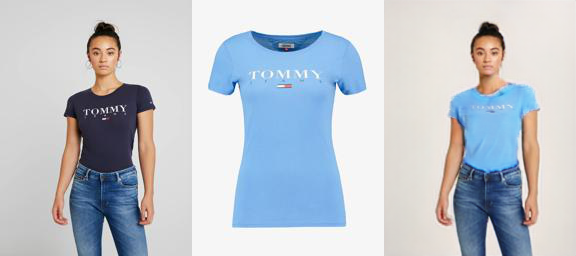

In [ ]:
output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_0.png')),
                np.array(Image.open('Data_preprocessing/test_color/000001_1.png')),
                np.array(Image.open('results/test/try-on/000001_0.png'))], axis=1)
image_grid = Image.fromarray(output_grid)
image_grid

### Check results in 'results' folder!

**Deleting all images**

In [ ]:
!rm -rf Data_preprocessing/test_color/*
!rm -rf Data_preprocessing/test_colormask/*
!rm -rf Data_preprocessing/test_edge/*
!rm -rf Data_preprocessing/test_img/*
!rm -rf Data_preprocessing/test_label/*
!rm -rf Data_preprocessing/test_mask/*
!rm -rf Data_preprocessing/test_pose/*
!rm -rf inputs/cloth/*
!rm -rf inputs/img/*

In [ ]:
!rm -rf results/*

In [ ]:
%cd /content/

/content


# SieveNet

In [ ]:
!git clone https://github.com/levindabhi/SieveNet.git
%cd SieveNet

Cloning into 'SieveNet'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 96 (delta 34), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (96/96), done.
/content/SieveNet


In [ ]:
!mkdir checkpoints
%cd checkpoints

!mkdir GMM
%cd GMM
!gdown --id 1zuL44-GpiXJqADjuKZWrKJzD1UNiwn5r
%cd ..

!mkdir SEG
%cd SEG
!gdown --id 1VtQHs2ynCZYFYre7JsF-TCObUv4X0dON
%cd ..

!mkdir TOM
%cd TOM
!gdown --id 1Er5bnFXu6zbSbRhniywcIZdbY2ceCMIp
%cd ..

%cd ..

/content/SieveNet/checkpoints
/content/SieveNet/checkpoints/GMM
Downloading...
From: https://drive.google.com/uc?id=1zuL44-GpiXJqADjuKZWrKJzD1UNiwn5r
To: /content/SieveNet/checkpoints/GMM/gmm_final.pth
123MB [00:01, 69.3MB/s]
/content/SieveNet/checkpoints
/content/SieveNet/checkpoints/SEG
Downloading...
From: https://drive.google.com/uc?id=1VtQHs2ynCZYFYre7JsF-TCObUv4X0dON
To: /content/SieveNet/checkpoints/SEG/segm_final.pth
117MB [00:01, 59.6MB/s]
/content/SieveNet/checkpoints
/content/SieveNet/checkpoints/TOM
Downloading...
From: https://drive.google.com/uc?id=1Er5bnFXu6zbSbRhniywcIZdbY2ceCMIp
To: /content/SieveNet/checkpoints/TOM/tom_final.pth
117MB [00:02, 43.1MB/s]
/content/SieveNet/checkpoints
/content/SieveNet


In [ ]:
%cd pose/
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

/content/SieveNet/pose
Downloading...
From: https://drive.google.com/uc?id=1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
To: /content/SieveNet/pose/pose_iter_440000.caffemodel
209MB [00:04, 48.9MB/s]
/content/SieveNet


In [ ]:
%%writefile config.py
import os.path as osp
import os


class parser:
    def __init__(self):
        self.dataroot = 'dataset'
        self.datamode = 'test'                                   #train, test
        self.stage = 'TOM'                                        #GMM, SEG, TOM
        self.runmode = self.datamode                              
        self.name = self.stage   
        if self.datamode == 'train':
            self.data_list = 'train_pairs.txt'
        elif self.datamode == 'test':
            self.data_list = 'test_pairs.txt'
        self.fine_width = 192
        self.fine_height = 256
        self.radius = 4
        self.grid_path =  osp.join(self.dataroot, 'grid.png')
        if self.datamode == 'train':                            #for training keep true, for test keep false
            self.shuffle = True             
        else:
            self.shuffle = False
        self.batch_size = 16
        self.workers = 1
        self.grid_size = 5
        
        self.lr = 0.002
        self.keep_step = 8000
        self.decay_step = 5500
        self.previous_step = 0                                  #if you want to resume training from some steps    
                                                                #set previous_step in as per last updated checkpoints 
        self.save_count = 200
        self.display_count = 50
        
        self.tensorboard_dir = osp.join(os.getcwd(), 'tensorboard')
        self.checkpoint_dir = osp.join(os.getcwd(), 'checkpoints')
        self.save_dir = osp.join(os.getcwd(), 'outputs')         #for saving output while infernce
        if not osp.exists(self.save_dir):
            os.makedirs(self.save_dir)
        if self.previous_step == 0:
            self.checkpoint = ''
        else:
            self.checkpoint = osp.join(self.checkpoint_dir, self.name, 'step_%06d.pth' % (self.previous_step))

        #Set your images path here
        self.input_image_path = 'custom/input/019579_0.jpg'
        self.input_image_path = '/content/SieveNet/000006_0.jpg'
        self.cloth_image_path = 'custom/input/017575_1.jpg'
        self.cloth_image_path = '/content/SieveNet/000530_1.jpg'
        
        self.human_parsing_image_path = '/content/SieveNet/000006_0.png'

In [ ]:
!python inference.py

OpenCV(ocl4dnn): consider to specify kernel configuration cache directory 
                 via OPENCV_OCL4DNN_CONFIG_PATH parameter.
OpenCL program build log: dnn/dummy
Status -11: CL_BUILD_PROGRAM_FAILURE
-cl-no-subgroup-ifp
Error in processing command line: Don't understand command line argument "-cl-no-subgroup-ifp"!
File saved at /content/SieveNet/000006_0_keypoints.json
initialization method [normal]
initialization method [normal]
initialization method [normal]
----checkpoints loaded from path: /content/SieveNet/checkpoints/GMM/gmm_final.pth----
----checkpoints loaded from path: /content/SieveNet/checkpoints/SEG/segm_final.pth----
----checkpoints loaded from path: /content/SieveNet/checkpoints/TOM/tom_final.pth----
Output generated!
Output saved at /content/SieveNet/outputs
